<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanCarlos_GarciaRendonMartinez/blob/main/Data_Analysis_with_Python_(Mod_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Nombre**: Juan Carlos Garcia Rendon Martinez

**Matrícula**: A01793708

**Materia**: Ciencia y Analitica de Datos

**Profesor**: Bernardo Charles Canales

**Fecha**: 23/10/2022

# Model Development
Revisaremos sobre:
Regresion Lineal y Multiple

Evaluar el modelo mediante Visuales

Regresiones Polinomiales y Pipelines

R**2 y Error medio para evalaur el modelo

Predicción y toma de decisiones

*Siempre hay que tomar las variables más relevantes para el modelo

# Linear and Multiple Linear Regression
Ser refiere a tener varias variables independientes para construir un modelo

El predictor suele ser la X y la variable dependiente la Y

En la ecuación Y= b0 + b1x
La b0 es la intercepción y la b1 la pendiente

Cuando tenemos un conjunto de modelos, entrenamos un modelo para obtener parametros, con los parámetros hacemos un modelo que podemos usar para predecir variables que no hemos visto antes.
1. Importar el modelo
2. Crear el Objeto de la regresión
3. Definir las variables
4. Usar el método Fit sobre las variables
5. Obtener la predicción


# Model Evaluation using Visualization
El gráfico de regresión nos da un buen est imado sobre la relación de las variables, su correlación y la dirección de la misma.
Para hacer un  gráfico se puede hacer usando seaborn con la función regplot

Esperamos ver en los residuos que no haya mucha varianza (que sea constante) y la media esté en cero para funciones lineales. En las curvas no se cumple esto.

Un gráfico de distribución muestra los valores reales vs los valores predichos. Cuando los valores son continuos suelen usarse estas gráficas ya que los histogramas son para las variables categóricas

# Polynomial Regression and Pipelines

Transformamos nuestra información en un polinomio y usamos la regresión polinómica para generar el modelo. Este método sí nos ayuda con las curvas. En general mientras más alto sea el orden de la regresión, esta se puede curvear más veces para ajustarse a la información.

Se puede usar el módulo de preprocesamiento de scikit para normalizar y escalar la data y hacerlo más fácil, posteriormente también podemos usar un pipeline que nos ayude a simplificar el proceso. En el cual podemos realizar todo nuestro preprocesamiento como escalar, construir el polinomio y generar un modelo. Despues se entrena el pipeline y hará todos los pasos que le indicamos.

# Measures for In-Sample Evaluation

Para medir que tan bien funciona un modelo podemos usa rel error cuadrático medio, para calcularlo revisamos la distancia entre cada predicción respecto al valor esperado, los sumamos y obtenemos el cuadrado.

También se tiene la R**2 y se conoce como método de determinación, el cual nos indica que tan cerca está la data sobre la linea de la regresión, y se endica como el porcentaje de la varaiciónh de la variable Y que se explica por el modelo lineal.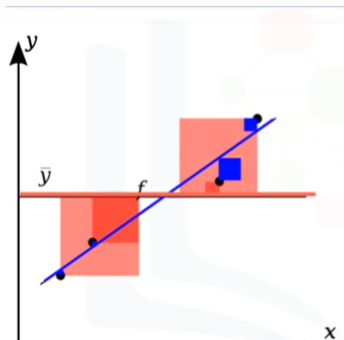

Se puede obtener con lm.score. Si el valor es negativo puede ser que esté sobre entrenado el modelo

# Prediction and Decision Making
Para determinar que el modelo es correcto debemos asegurarnos que los valores tienen sentido, usar visualización, modelos numericos para evaluar y también usar otros modelos

En el ejemplo hacemos una secuencia del 1 al 100, y podemos ver como se comporta, en la grafica residual vemos que no tiene comportamiento lineal. En la visualización también vemos en que rango se pierde la capacidad de predicción. El modelo numérico de media cuadrática suele ser el más usado de todos.


# Lab 4
#Cargamos librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#Cargamos las librerias
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
#Recuperamos las variables
X = df[['highway-mpg']]
Y = df['price']
#Entrenamos el modelo
lm.fit(X,Y)

#Generamos una predicción
Yhat=lm.predict(X)
print(Yhat[0:5])

#La intercepción de A está en
print(lm.intercept_)

#Y tiene una pendiente de: 
print(lm.coef_)

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
38423.3058581574
[-821.73337832]


In [ ]:
#Question 1a
lm1 = LinearRegression()
lm1

LinearRegression()

In [ ]:
#Question 1b
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [ ]:
#Question 1c
lm1.coef_

array([[166.86001569]])

In [ ]:
#Question 1d
Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*df['engine-size']

In [ ]:
#Ahora realizaremos otro modelo con más variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print(lm.intercept_)
print(lm.coef_)

-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


In [ ]:
#Question 2a
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

#Question 2b
lm2.coef_

array([   1.49789586, -820.45434016])

(0.0, 48188.049171995764)

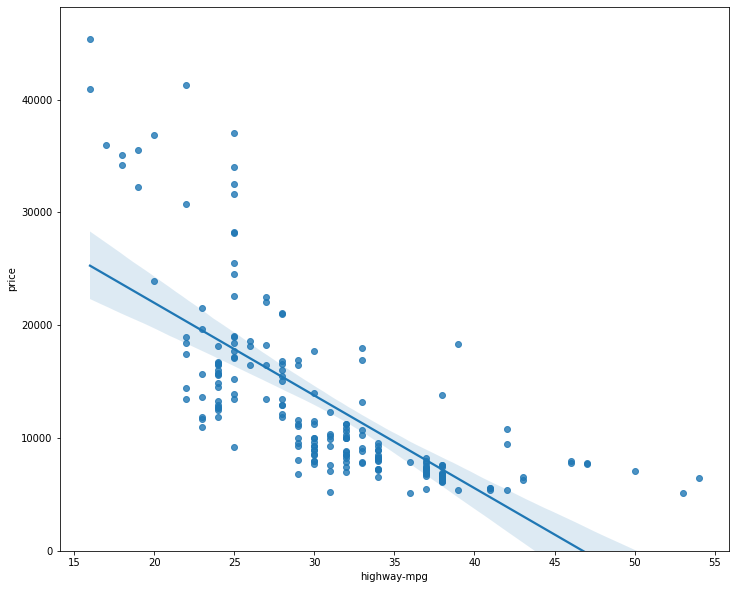

In [ ]:
import seaborn as sns
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

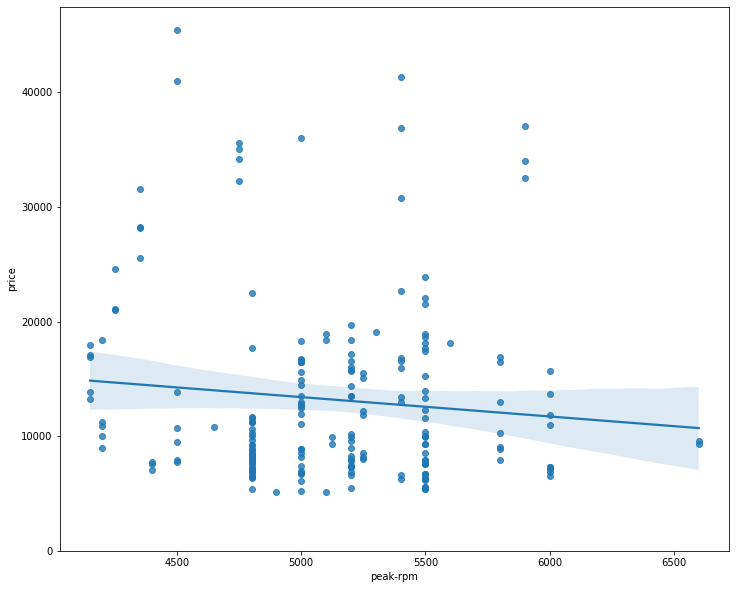

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
#Question 3
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


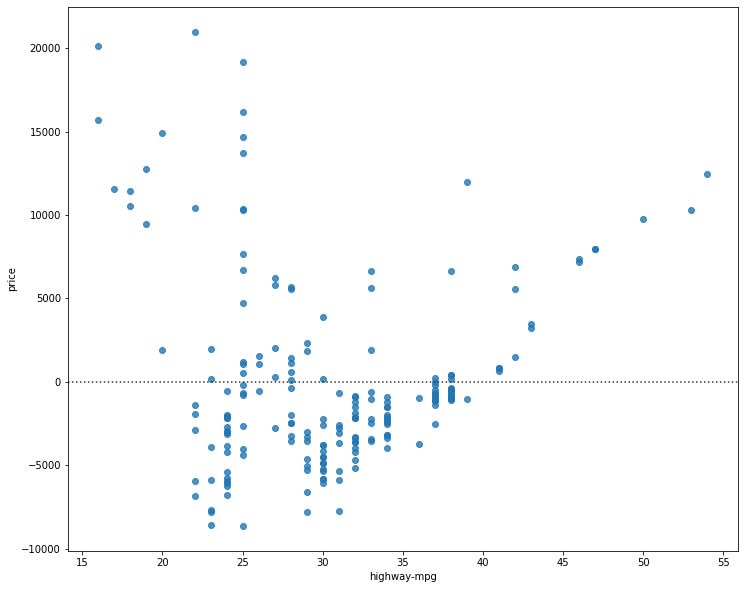

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


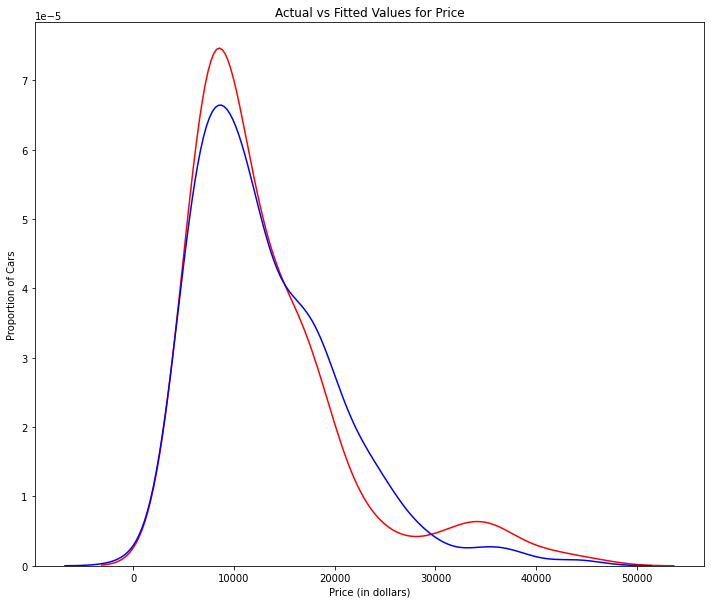

In [ ]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


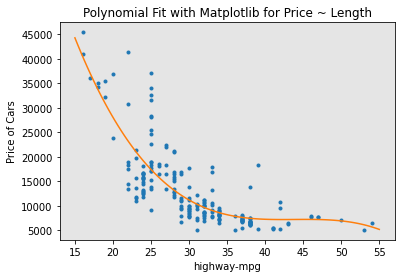

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


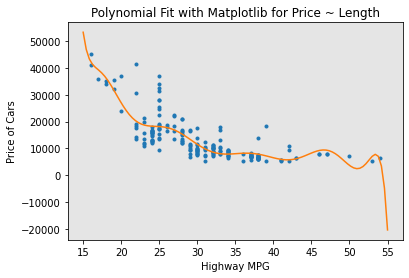

In [ ]:
#Question 4
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(Z)
Z.shape
Z_pr.shape

(201, 15)

In [ ]:
#Vamos a hacer un pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
#Question 5
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Graded Review Questions
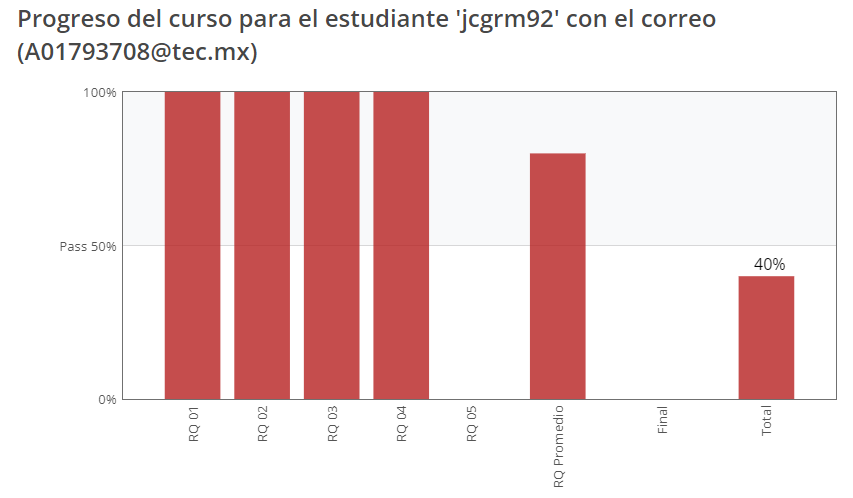